In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Get to know our data

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# I realize we will have to spend quite some time on data wrangling.
# e.g. installs columns should be type int but it apprears to be string with '+' sign.

In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
# Missing data percentage
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Content Rating,1,0.009224
Type,1,0.009224
Last Updated,0,0.000000


In [10]:
# Let check app duplicate name

In [11]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


## Data Cleaning

In [12]:
# let drop all duplicated apps
df.drop_duplicates(subset='App', inplace = True)
df.shape

(9660, 13)

In [13]:
df.Installs.value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

In [14]:
# Installs column should be only in numerical values so I will drop app that has install in word eg. free
df = df[df.Installs != 'Free']
df.loc[:, df.columns != 'Rating'].isnull().sum()

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [15]:
# Let look at avg app rating head()
df.groupby('Category')['Rating'].mean().head()

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
Name: Rating, dtype: float64

In [16]:
# At first I would replace null ratings with avg rating on each category but when I look at the boxplot 
# rating I feel like it is not fair to rate bad apps with avg rating in the same category and 
# since we have enough data to do our analysis, I decide to drop all null values in rating columns

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [19]:
# Good. We just take care of nan values but we're not done yet. Let continue...

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
App               8190 non-null object
Category          8190 non-null object
Rating            8190 non-null float64
Reviews           8190 non-null object
Size              8190 non-null object
Installs          8190 non-null object
Type              8190 non-null object
Price             8190 non-null object
Content Rating    8190 non-null object
Genres            8190 non-null object
Last Updated      8190 non-null object
Current Ver       8190 non-null object
Android Ver       8190 non-null object
dtypes: float64(1), object(12)
memory usage: 895.8+ KB


In [22]:
# convert reviews from object to int
df['Reviews'] = df.Reviews.astype(int)

In [23]:
# size should be in float type not object but size has letter at the end such as 'M', 'K' so we need to 
# take care of them 1st before convert to float

In [24]:
df.Size[0]

'19M'

In [25]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return x
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return x
    elif size == 'Varies with device':
        return np.nan
    else:
        x = float(size)
        return x

In [26]:
df['Size'] = df['Size'].map(change_size)

In [27]:
# There is still one thing that we need to take care which is
# 'Varies with device' value in Size column. 
# I already converted it to nah and now I will replace it mean of size in each category

In [28]:
df.Size.isnull().sum()

1169

In [29]:
category_avg_size = df.groupby('Category')['Size'].mean().astype(int).to_dict()
def fill_null_size(size):
    category = size[0]
    actual_size = size[1]
    if pd.isnull(actual_size):
        return category_avg_size[category]
    else:
        return actual_size

In [30]:
df['Size'] = df[['Category','Size']].apply(fill_null_size, axis = 1)

In [31]:
df.Size.isnull().sum()

0

In [32]:
# Let take care of Installs column

In [33]:
df.Installs.value_counts()

1,000,000+        1414
100,000+          1094
10,000+            986
10,000,000+        937
1,000+             696
5,000,000+         607
500,000+           503
50,000+            456
5,000+             424
100+               303
50,000,000+        202
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

In [34]:
df['Installs'] = df['Installs'].apply(lambda x: int(x[:-1].replace(',', '')))

In [35]:
# Let take care Price column

In [36]:
df.Price.value_counts().head()

0        7588
$2.99     109
$0.99     103
$4.99      68
$1.99      59
Name: Price, dtype: int64

In [37]:
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$', '')))

In [38]:
df.Price.value_counts().head()

0.00    7588
2.99     109
0.99     103
4.99      68
1.99      59
Name: Price, dtype: int64

In [39]:
# Genres columns

In [40]:
df.Genres.value_counts().head()

Tools            716
Entertainment    471
Education        429
Finance          302
Productivity     301
Name: Genres, dtype: int64

In [41]:
df.Genres.value_counts().tail(10)

Lifestyle;Education                  1
Travel & Local;Action & Adventure    1
Tools;Education                      1
Parenting;Brain Games                1
Lifestyle;Pretend Play               1
Adventure;Brain Games                1
Role Playing;Brain Games             1
Board;Pretend Play                   1
Casual;Music & Video                 1
Arcade;Pretend Play                  1
Name: Genres, dtype: int64

In [42]:
# Looks like some apps have two categories and I think we should drop the second categories so we can have
# consistent Genres data. Also
# many genre contain only few record, it may make a bias.

In [43]:
df['Genres'] = df['Genres'].apply(lambda x: x.split(';')[0])

In [44]:
df.Genres.value_counts()

Tools                      717
Entertainment              502
Education                  498
Action                     304
Lifestyle                  302
Finance                    302
Productivity               301
Personalization            296
Medical                    290
Sports                     270
Business                   263
Photography                263
Communication              257
Health & Fitness           246
Casual                     217
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     122
Maps & Navigation          118
Role Playing               111
Racing                     103
Strategy                    95
Food & Drink                94
Educational                 93
Adventure                   78
Auto & V

In [45]:
# Next is Last Updated column
# I want to create a new column based on last update column 
# which measures how long has this app got update in days ago

In [46]:
# Convert Last Updated to date type
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [47]:
df['Last Updated'].describe()

count                    8190
unique                   1299
top       2018-08-03 00:00:00
freq                      245
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [48]:
# I will use df['Last Updated'].max() as today date since we don't know when exactly this datasets is created
df['Last Updated'].max()

Timestamp('2018-08-08 00:00:00')

In [49]:
# Example of finding difference between two dates in pandas
df['Last Updated'][0] -  df['Last Updated'].max()

Timedelta('-213 days +00:00:00')

In [50]:
df['Updated Since'] = (df['Last Updated'] - df['Last Updated'].max()).dt.days
df['Updated Since'] = df['Updated Since'].abs()
df['Updated Since'].head()

0    213
1    205
2      7
3     61
4     49
Name: Updated Since, dtype: int64

In [51]:
# I will drop Current Ver and Android Ver since I don't think they'll contribute much to our analysis

In [52]:
df.drop(labels=['Current Ver', 'Android Ver'], axis= 1, inplace=True)

In [53]:
# Last but not least, I think we should reformat Category title to make it easier to read
df['Category'] = df.Category.apply(lambda x: x.replace('_', ' ').title())

In [54]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Updated Since
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,213
1,Coloring book moana,Art And Design,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,7
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,61
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design,2018-06-20,49


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 12 columns):
App               8190 non-null object
Category          8190 non-null object
Rating            8190 non-null float64
Reviews           8190 non-null int32
Size              8190 non-null float64
Installs          8190 non-null int64
Type              8190 non-null object
Price             8190 non-null float64
Content Rating    8190 non-null object
Genres            8190 non-null object
Last Updated      8190 non-null datetime64[ns]
Updated Since     8190 non-null int64
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(5)
memory usage: 1.1+ MB


In [56]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Updated Since
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,213
1,Coloring book moana,Art And Design,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,7
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,61
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design,2018-06-20,49


## Visualization

Text(-9.75,0.5,'Category')

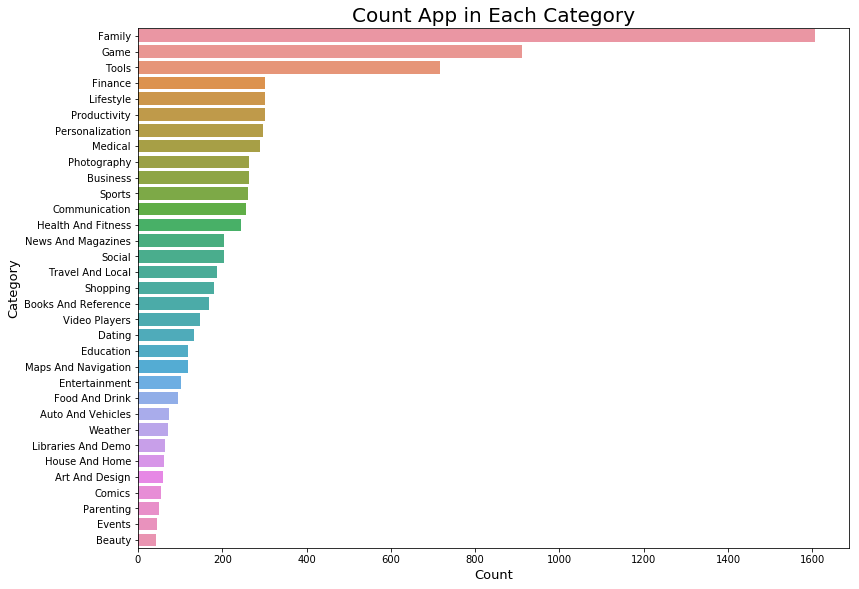

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.tight_layout()
plt.title('Count App in Each Category', size= 20)
plt.xlabel('Count', size= 13)
plt.ylabel('Category',size=13)

In [58]:
df.Category.value_counts()[:3].sum() / df.Category.value_counts().sum() * 100

39.51159951159951

In [59]:
# Family, Game, Tools category are the most appearances for application in store with combined almost 40% in the market

Text(0.5,1,'Category vs Rating')

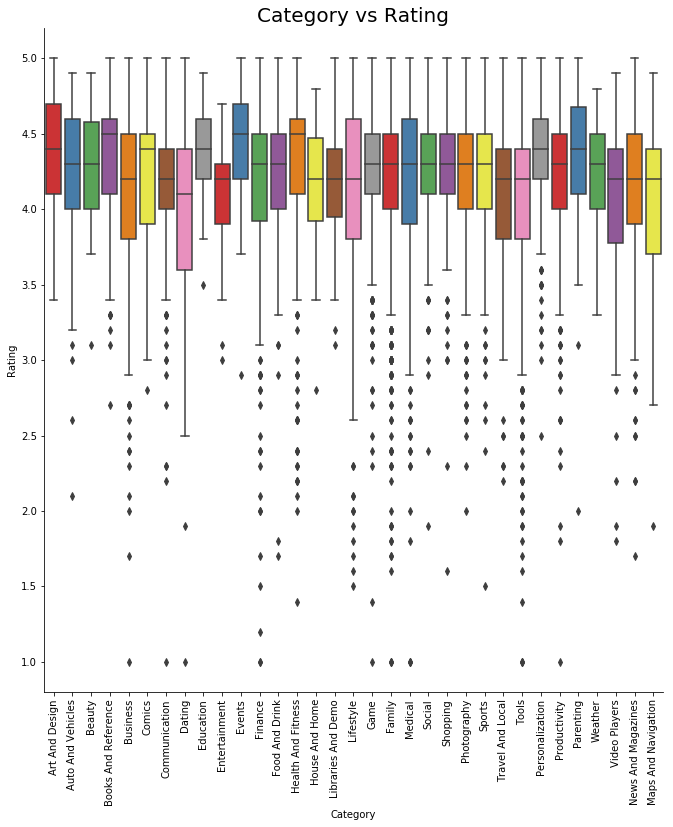

In [104]:
g = sns.catplot(x="Category",y="Rating",data=df, kind="box", height = 10 ,
palette = "Set1")
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Category vs Rating',size = 20)

- Almost all app categories have decently rating. However, Health and Fitness and Books and Reference produce the highest quality apps with 50% apps having a rating greater than 4.5. This is extremely high!
- On the contrary, Dating apps don't seem to perform well with 50% of apps in the category barely above 4.1 rating

In [61]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Updated Since
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,213
1,Coloring book moana,Art And Design,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,7
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,61
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design,2018-06-20,49


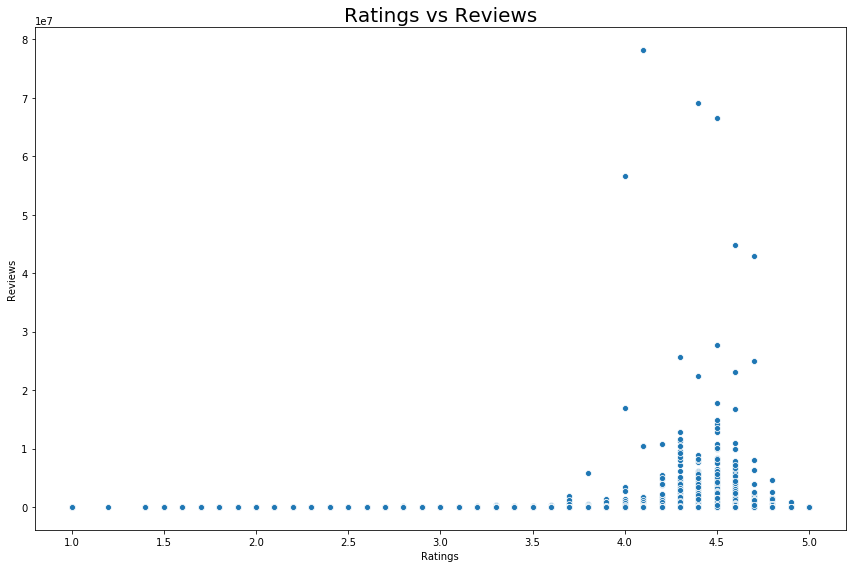

In [62]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Rating', y='Reviews',data = df)
plt.title('Ratings vs Reviews', size = 20)
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.tight_layout()

It looks like most apps have less than 10 millions reviews but there are still some apps which have a lot of reviews eg. 70 millions, 78 millions. The question is does it mean the more app reviews, the better ratings? By looking at the chart above, I think it does look like it.

In [63]:
# I want to see what are those apps which have more than 30 millions reviews
df[df.Reviews > 30000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Updated Since
335,Messenger – Text and Video Chat for Free,Communication,4.0,56642847,11951723.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,7
336,WhatsApp Messenger,Communication,4.4,69119316,11951723.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,5
1670,Clash of Clans,Game,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,24
2544,Facebook,Social,4.1,78158306,17313538.0,1000000000,Free,0.0,Teen,Social,2018-08-03,5
2545,Instagram,Social,4.5,66577313,17313538.0,1000000000,Free,0.0,Teen,Social,2018-07-31,8


In [64]:
# Oh yeah! Those are all well-known all

Text(0,0.5,'Count')

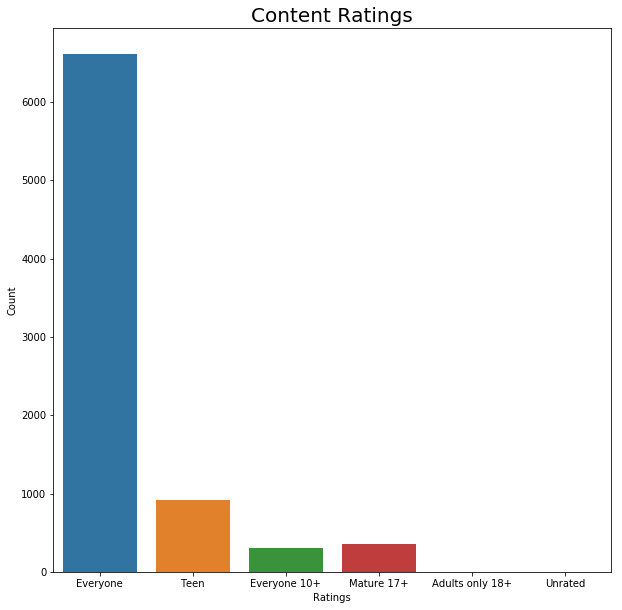

In [65]:
plt.figure(figsize = (10,10))
sns.countplot(x='Content Rating', data=df)
plt.title('Content Ratings', size = 20)
plt.xlabel('Ratings')
plt.ylabel('Count')

In [66]:
# We have over 6000 apps with rating for everyone

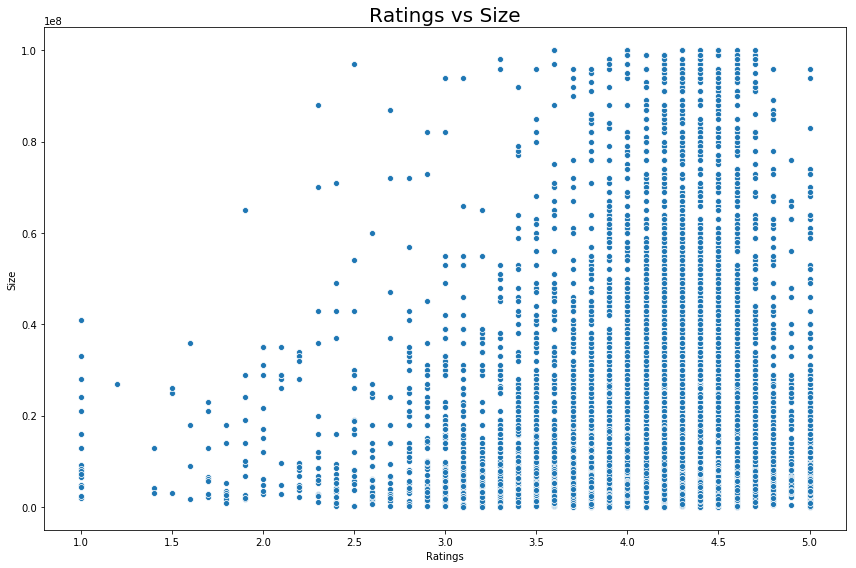

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Rating', y='Size',data = df)
plt.title('Ratings vs Size', size = 20)
plt.xlabel('Ratings')
plt.ylabel('Size')
plt.tight_layout()

Does size have affect on app rating? Looking the chart above, I don't think so. Even the app with less than 20 millions in size still can get 4.0 or higher ratings.

Text(0.5,1,'Rating VS Installs')

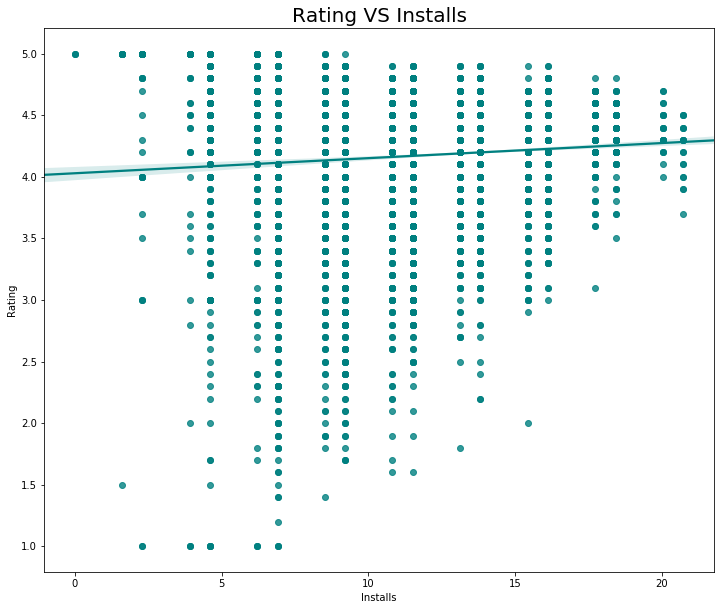

In [68]:
plt.figure(figsize = (12,10))
sns.regplot(x=np.log(df["Installs"]), y=df.Rating, color = 'teal');
plt.title('Rating VS Installs',size = 20)

Seem like number of install affect to rating


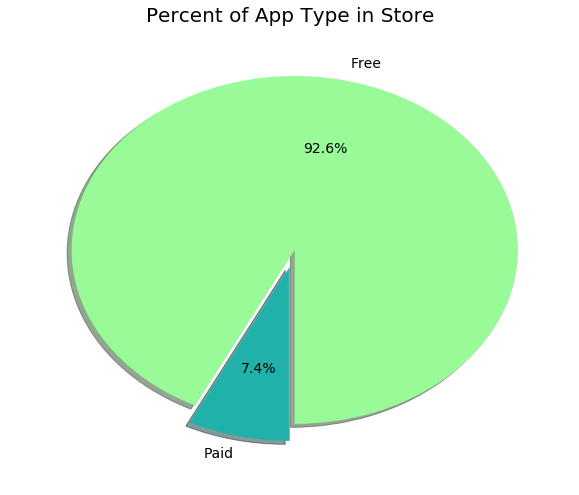

In [69]:
plt.figure(figsize=(10,8))
labels =df['Type'].value_counts().index
sizes = df['Type'].value_counts()
colors = ["palegreen","lightseagreen"]
explode = (0.1,0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270, textprops={'fontsize': 14})
plt.title('Percent of App Type in Store',size = 20, y=1.05)
plt.show()

In [70]:
# Most of application in this store are free (93.1%).

Text(0.5,1,'App Price Count')

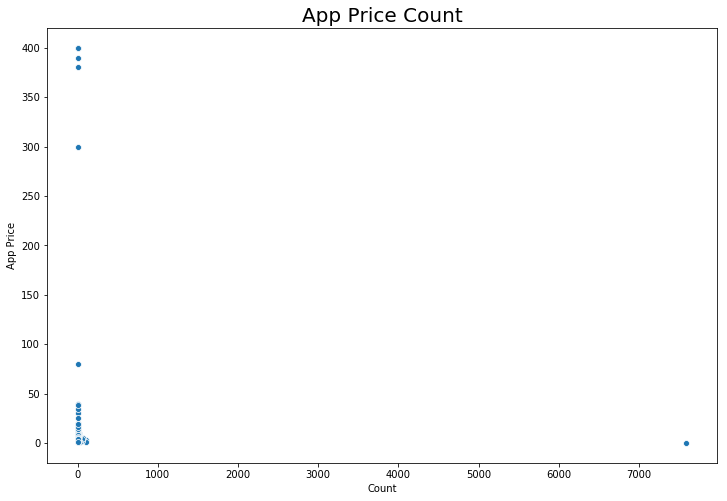

In [178]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.Price.value_counts().values, y=df.Price.value_counts().index)
plt.xlabel('Count')
plt.ylabel('App Price')
plt.title('App Price Count', size= 20)

In [72]:
df['Price'].describe()

count    8190.000000
mean        1.038342
std        16.864040
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Average of price is around 1 dollar but most of apps are free. The most expensive app is 400 dollar!!!

Text(0.5,1,'Rating VS Price')

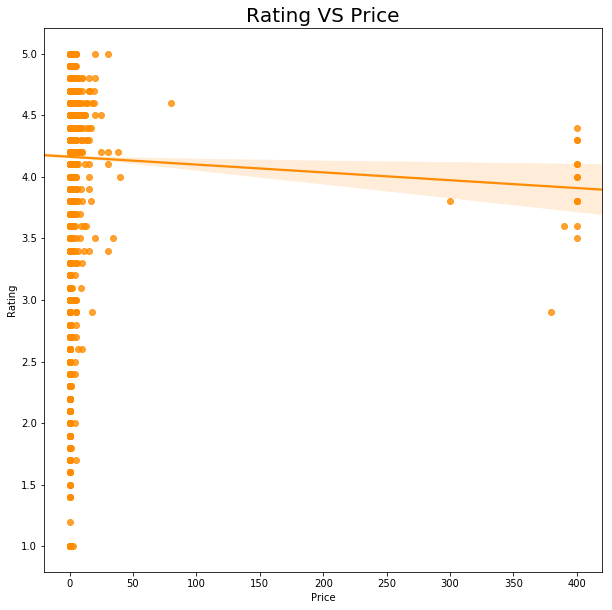

In [73]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=df[df['Reviews']<1000000]);
plt.title('Rating VS Price',size = 20)

It's hard to confirm that higher app price will affect app rating but it does seem like higher price app may make customer disappointed.

Text(6.675,0.5,'Rating')

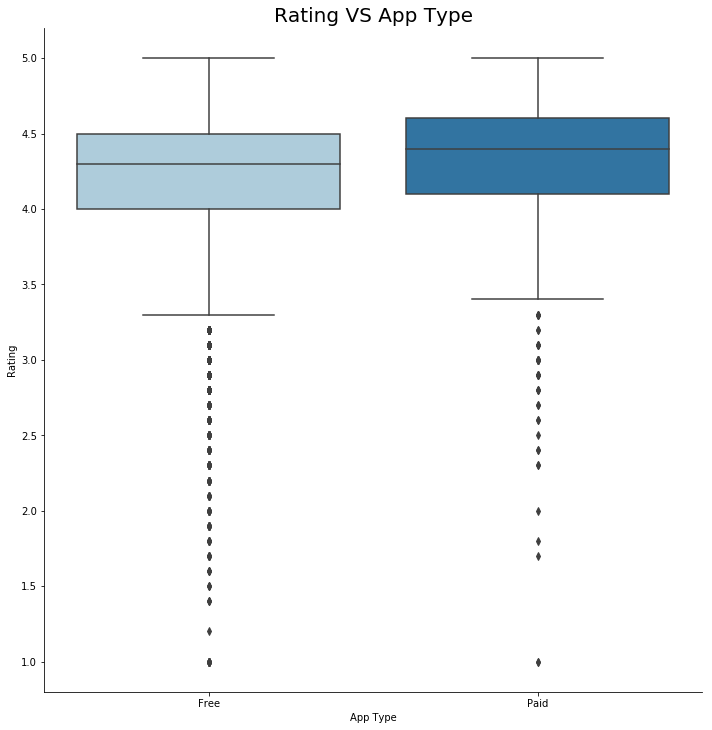

In [74]:
g = sns.catplot(x="Type",y="Rating",data=df, kind="box", height = 10 ,palette = "Paired")
plt.title('Rating VS App Type',size = 20)
plt.xlabel('App Type')
plt.ylabel('Rating')

In [75]:
df.Type.value_counts()

Free    7588
Paid     602
Name: Type, dtype: int64

By looking at the chart above, app rating doesn't seem to be affected by app type. However, we have a lot of free apps compared to paid apps so there could be bias.

Text(0.5,1,'Rating VS Content Rating')

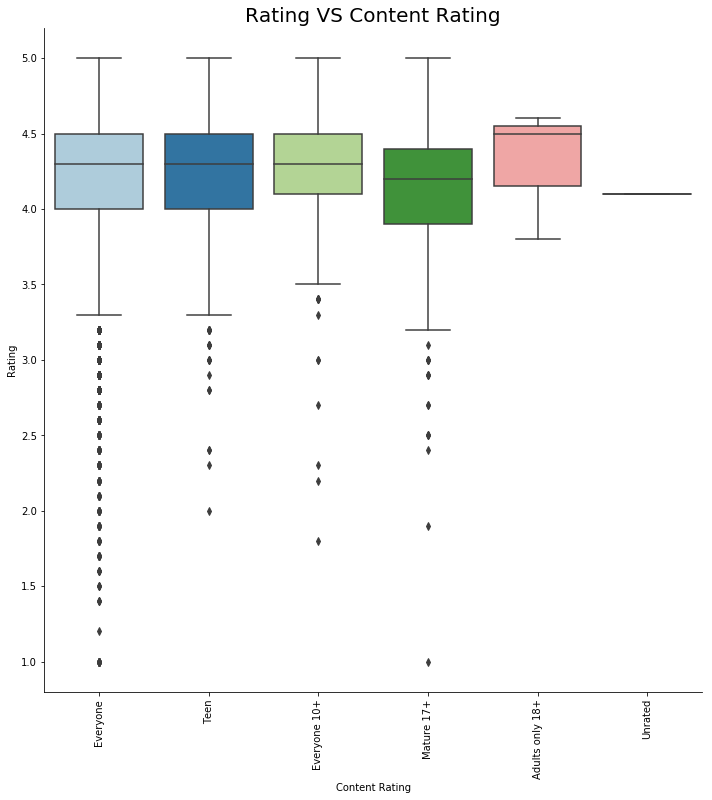

In [76]:
g = sns.catplot(x="Content Rating",y="Rating",data=df, kind="box", height = 10 ,palette = "Paired")
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Rating VS Content Rating',size = 20)

In [77]:
df['Content Rating'].value_counts()

Everyone           6612
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Content Rating not effect too much to rating, but in Mature applications, it looks like they get lower rating than other.

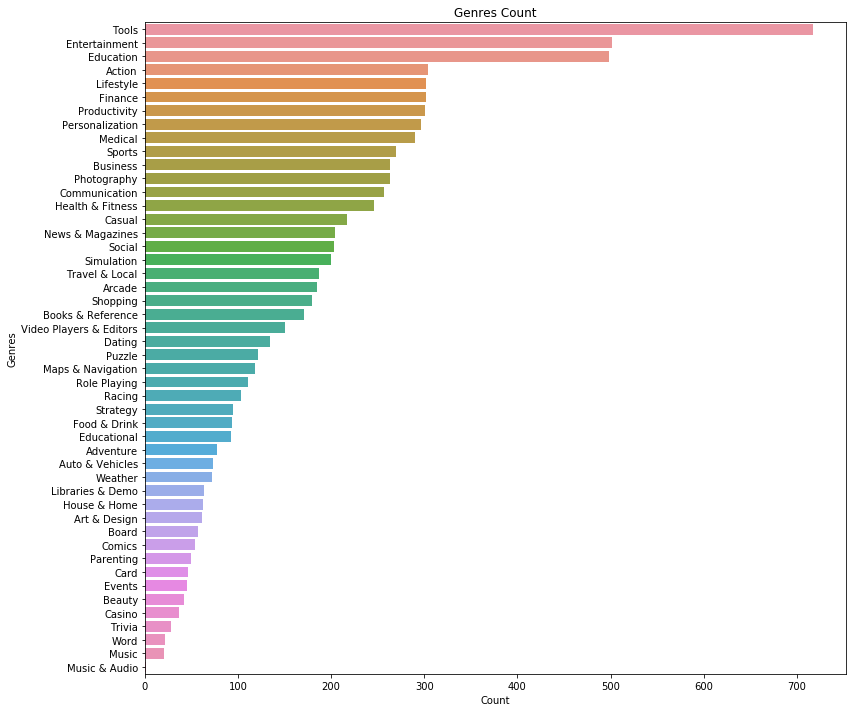

In [81]:
plt.figure(figsize=(12,10))
sns.countplot(y= df.Genres, order=df['Genres'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Genres Count')
plt.tight_layout()

In [82]:
# Tools genre has the most apps in the store

Text(0.5,1,'Genre vs Rating')

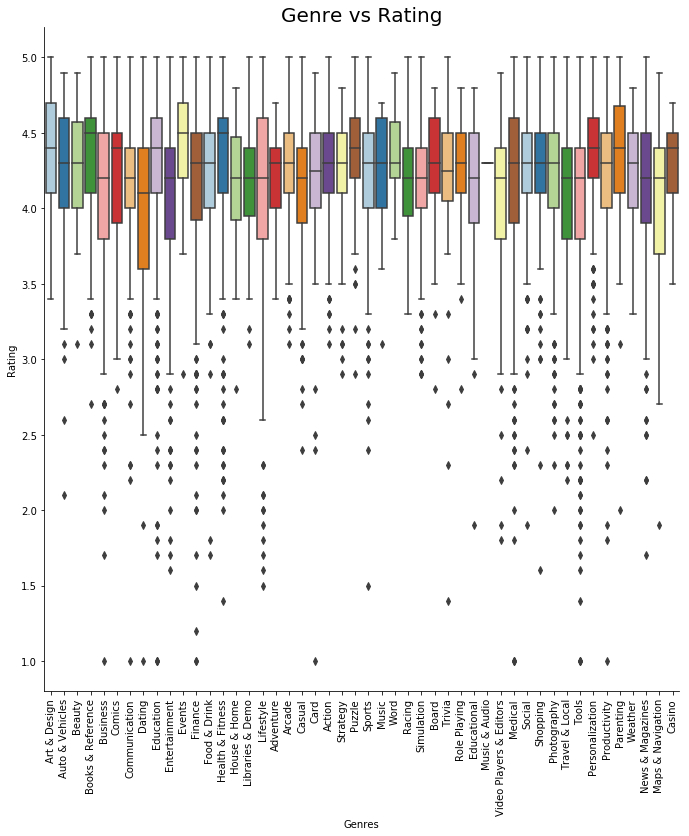

In [102]:
g = sns.catplot(x="Genres",y="Rating",data=df, kind="box", height = 10 ,palette = "Paired")
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Genre vs Rating',size = 20)

Text(0.5,1,'Genre VS Rating')

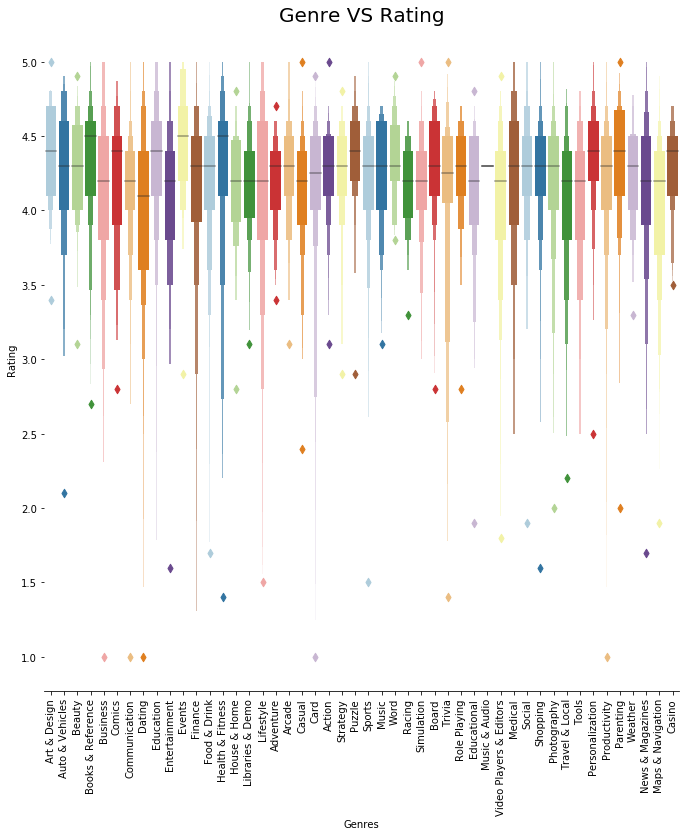

In [114]:
# another kind of Genre vs Rating chart
g = sns.catplot(x="Genres",y="Rating",data=df, kind="boxen", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Genre VS Rating',size = 20)

The chart above looks similar to Category vs Rating chart that we did earlier. It seems like genre doesn't affect too much on rating. The lowest rating average on genre is Dating with 3.97 while the highest is Events with 4.43.

In [120]:
df['Updated Since'].value_counts().head()

5    245
6    210
7    199
8    189
9    148
Name: Updated Since, dtype: int64

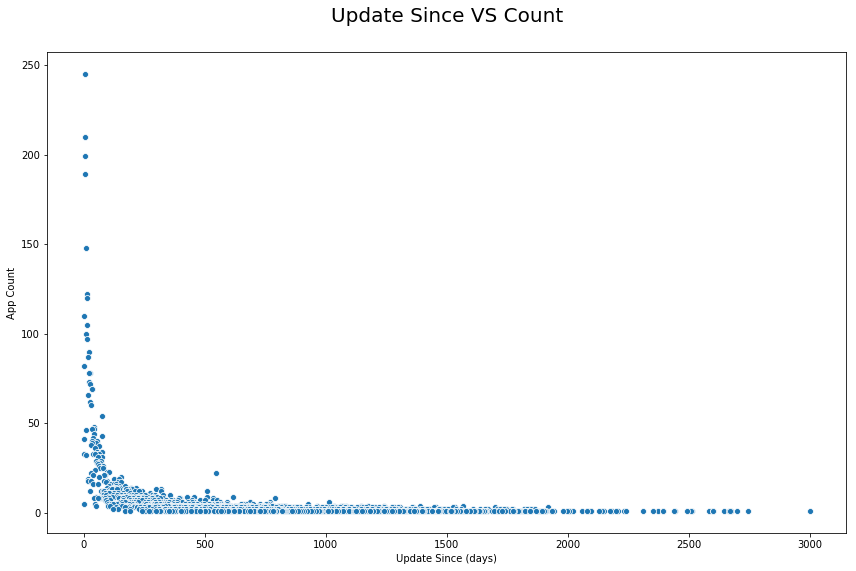

In [147]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Updated Since'].value_counts().index, y= df['Updated Since'].value_counts().values)
plt.title('Update Since VS Count',size = 20, y= 1.05)
plt.xlabel('Update Since (days)')
plt.ylabel('App Count')
plt.tight_layout()

In [143]:
df['Updated Since'].describe()

count    8190.000000
mean      275.629060
std       411.070744
min         0.000000
25%        20.000000
50%        80.000000
75%       356.000000
max      3001.000000
Name: Updated Since, dtype: float64

It doesn't seem like apps are getting updated often. The avg update interval for app is 275 days but suprisingly we have app that gets updated 3001 days since last launch/updated. I think those app are either 1 time launch which means after launch/update, it won't have any future update.

Text(0.5,1,'Rating vs Update Since')

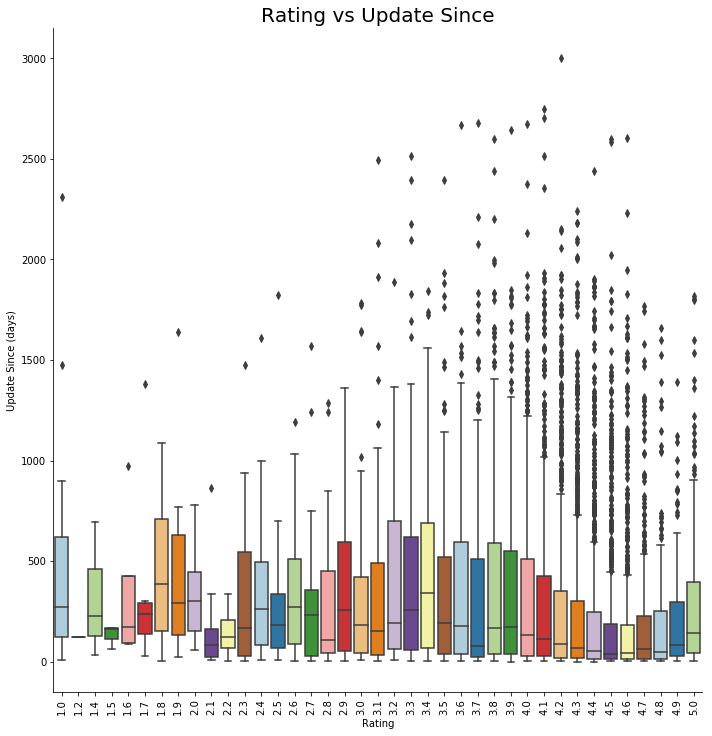

In [156]:
g = sns.catplot(x="Rating",y="Updated Since",data=df, kind="box", height = 10 ,palette = "Paired")
g.set_xticklabels(rotation=90)
g.set_ylabels("Update Since (days)")
g.set_xlabels('Rating')
plt.title('Rating vs Update Since',size = 20)

Text(0.5,1,'Rating vs Update Since')

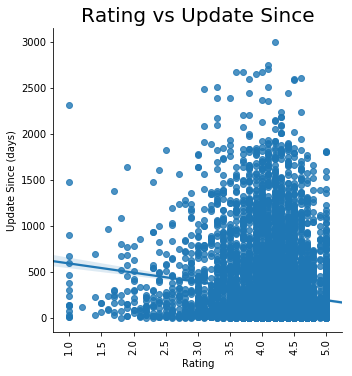

In [165]:
g = sns.lmplot(x="Rating", y="Updated Since", data=df)
g.set_xticklabels(rotation=90)
g.set_ylabels("Update Since (days)")
g.set_xlabels('Rating')
plt.title('Rating vs Update Since',size = 20)

It does seem like app with update interval less than 2000 days since last updated/launch have better ratings.

In [172]:
df[['Updated Since', 'Rating']].corr()

,Updated Since,Rating
Updated Since,1.000000,-0.130195
Rating,-0.130195,1.000000


In [173]:
# Looking at corr between them, there is actually a negative correlation.

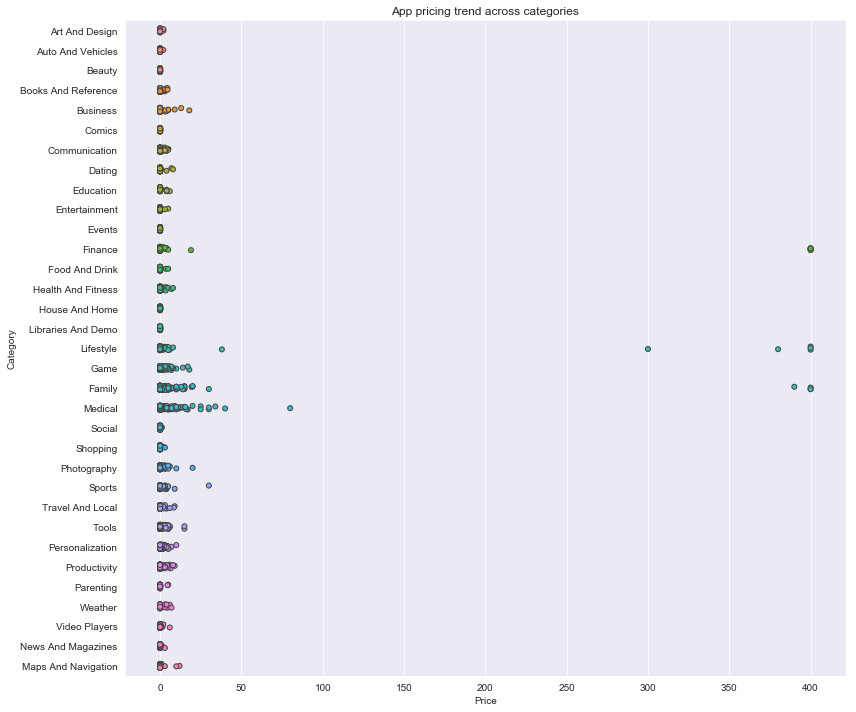

In [203]:
plt.figure(figsize=(12,10))
subset_df = df[df.Category.isin(df.Category.unique().tolist())]
sns.set_style('darkgrid')
sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
plt.title('App pricing trend across categories')
plt.tight_layout()

We already know most apps are free and the highest app cost is 400. However, we now know we can expect to see paid apps under game, family, medical, business, or lifestyle category.

## Conclusion

After our analysis, I believe
- Family, Game, Tools category are the most appearances for application in store with combined almost 40% in the market so when you decide to launch your app within those categories, keep in mind you will face a lot of competition. 
- Almost all app categories have decently rating. However, Health and Fitness and Books and Reference produce the highest quality apps with 50% apps having a rating greater than 4.5. As a result, if your app is under those categories, you have to make sure your rating is close or above 4.5 to make it competitive with others. 
- Dating apps don't seem to perform well with 50% of apps in the category barely above 4.1 rating. So if your app is under Dating category, make sure you keep that in mind.
- The more app reviews, the better ratings.
- Size does not have affect on app rating so try focus on your app quality rather than quantity
- Most of application in this store are free (93.1%) and it's hard to confirm that higher app price will affect app rating but it does seem like higher price app may make customer disappointed if it doesn't live up to expectation.
- Content Rating does not effect too much to rating, but in Mature applications, it looks like they get lower rating than other.
- Tools genre has the most apps in the store. What does it mean? It means the type of app that you are about to launch or create has higher chance to already be in the store. Make sure you do a research to make your app unique than others.
- It seems like genre doesn't affect too much on rating. The lowest rating average on genre is Dating with 3.97 while the highest is Events with 4.43. Again, if your app is in Dating genre, be sure it is a good app otherwise it is hard get 4 stars or above.